## Import packages and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../cleaned_data/cc_data_cleaned.csv', index_col=0)

## Initial exploration of dataset

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,lat,long,city_pop,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,NC,36.0788,-81.1781,3495,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,ID,42.1808,-112.2620,4154,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,MT,46.2306,-112.1138,1939,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,VA,38.4207,-79.4629,99,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852243 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   state                  object 
 9   lat                    float64
 10  long                   float64
 11  city_pop               int64  
 12  dob                    object 
 13  trans_num              object 
 14  merch_lat              float64
 15  merch_long             float64
 16  is_fraud               int64  
dtypes: float64(5), int64(3), object(9)
memory usage: 254.4+ MB


In [5]:
#Convert 'cc_num' to object
df['cc_num'] = df['cc_num'].apply(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852243 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 object 
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   state                  object 
 9   lat                    float64
 10  long                   float64
 11  city_pop               int64  
 12  dob                    object 
 13  trans_num              object 
 14  merch_lat              float64
 15  merch_long             float64
 16  is_fraud               int64  
dtypes: float64(5), int64(2), object(10)
memory usage: 254.4+ MB


In [6]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.852243e+06,1.852243e+06,1.852243e+06,1.852243e+06,1.852243e+06,1.852243e+06,1.852243e+06
mean,6.929836e+01,3.853932e+01,-9.022788e+01,8.864289e+04,3.853898e+01,-9.022799e+01,5.210439e-03
std,1.277793e+02,5.071473e+00,1.374793e+01,3.014889e+05,5.105606e+00,1.375973e+01,7.199509e-02
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.902742e+01,-1.666716e+02,0.000000e+00
25%,9.640000e+00,3.466890e+01,-9.679800e+01,7.410000e+02,3.474016e+01,-9.689946e+01,0.000000e+00
50%,4.744000e+01,3.935430e+01,-8.747690e+01,2.443000e+03,3.936886e+01,-8.744067e+01,0.000000e+00
75%,8.309000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,4.195626e+01,-8.024517e+01,0.000000e+00
max,9.754720e+03,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
#Finiding unique values in each column
df.nunique()

trans_date_trans_time    1819402
cc_num                       999
merchant                     693
category                      14
amt                        60465
first                        355
last                         486
gender                         2
state                         51
lat                          983
long                         983
city_pop                     891
dob                          984
trans_num                1852243
merch_lat                1754028
merch_long               1809608
is_fraud                       2
dtype: int64

We can use 'trans_num' as a unique identifier for each transaction.

In [8]:
#how many of each class?
class_count = pd.DataFrame(df.groupby('is_fraud')['is_fraud'].count())
class_count.columns = ['count']
class_count['pct'] = class_count['count']/class_count['count'].sum()
class_count

,count,pct
is_fraud,,
0,1842592,0.99479
1,9651,0.00521


## Exploring 'trans_date_trans_time'

In [9]:
# Convert to datetime 
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

### Extracting 'hour'

In [10]:
# get transaction hour from transaction time
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

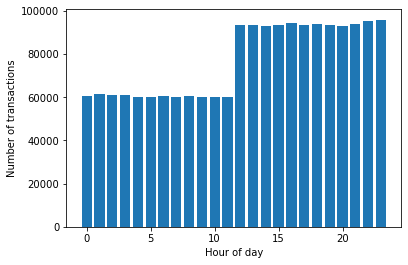

In [11]:
#bar graph of number of transactions by trans_hour
plt.bar(df['trans_hour'].value_counts().sort_index().index, df['trans_hour'].value_counts().sort_index())
plt.xlabel('Hour of day')
plt.ylabel('Number of transactions')
plt.show()

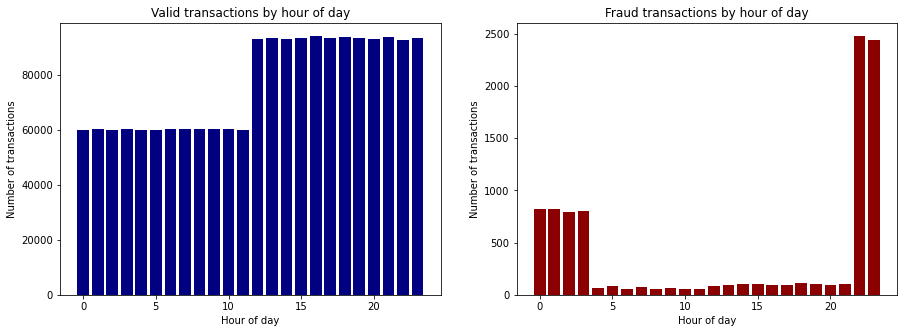

In [12]:
#bar graph of number of transactions by trans_hour, separated by is_fraud

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].bar(df[df['is_fraud']==0]['trans_hour'].value_counts().index, df[df['is_fraud']==0]['trans_hour'].value_counts(), color = 'navy')
ax[1].bar(df[df['is_fraud']==1]['trans_hour'].value_counts().index, df[df['is_fraud']==1]['trans_hour'].value_counts(), color = 'darkred')

ax[0].set_xlabel('Hour of day')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by hour of day')

ax[1].set_xlabel('Hour of day')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by hour of day')

plt.show()

It's very clear that most fraud transactions take place during abnormal hours of the day. We'll create a new feature that binarizes this information.

In [13]:
#create a new column for abnormal hours

df['abnormal_hours'] = 0
df.loc[(df['trans_hour'] >= 23) | (df['trans_hour'] <= 3), 'abnormal_hours'] = 1
df.loc[(df['trans_hour'] >= 4) & (df['trans_hour'] <= 21), 'abnormal_hours'] = 0

In [14]:
df.abnormal_hours.value_counts()

0    1512609
1     339634
Name: abnormal_hours, dtype: int64

### Extracting day_of_week

In [15]:
#extract day of week
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week'].value_counts()

Monday       369383
Sunday       343656
Tuesday      270317
Saturday     263201
Friday       215063
Thursday     206724
Wednesday    183899
Name: day_of_week, dtype: int64

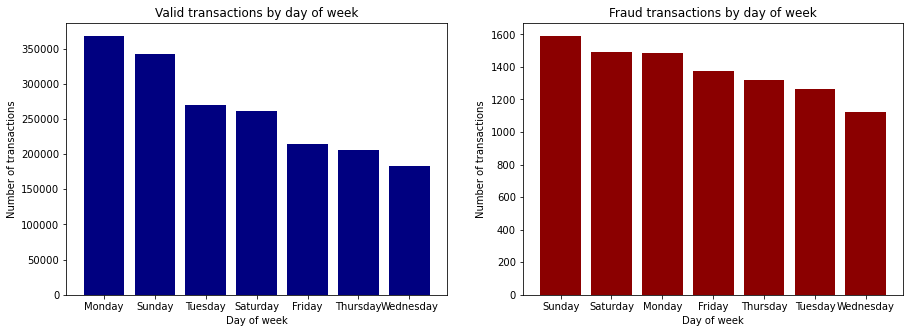

In [17]:
# compare day of week transactions for valid vs fraud transactions

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(df[df['is_fraud']==0]['day_of_week'].value_counts().index, df[df['is_fraud']==0]['day_of_week'].value_counts(), color = 'navy')
ax[1].bar(df[df['is_fraud']==1]['day_of_week'].value_counts().index, df[df['is_fraud']==1]['day_of_week'].value_counts(), color = 'darkred')

ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by day of week')

ax[1].set_xlabel('Day of week')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by day of week')

plt.show()

Most fraud transactions take place on Sunday, Saturday and Monday. We'll one hot encode this variable later on.

### Extract year_month

In [19]:
# Extract year-month from trans_date_trans_time
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1852389    2020-12
1852390    2020-12
1852391    2020-12
1852392    2020-12
1852393    2020-12
Name: year_month, Length: 1852243, dtype: period[M]

In [20]:
#Get the number of transactions for each year_month
df_year_month = df.groupby(df['year_month'])['trans_num'].count()

In [21]:
df_year_month

year_month
2019-01     52521
2019-02     49864
2019-03     70926
2019-04     68071
2019-05     72530
2019-06     86059
2019-07     86587
2019-08     87352
2019-09     70645
2019-10     68754
2019-11     70416
2019-12    141045
2020-01     52200
2020-02     47787
2020-03     72844
2020-04     66887
2020-05     74339
2020-06     87799
2020-07     85839
2020-08     88755
2020-09     69525
2020-10     69344
2020-11     72630
2020-12    139524
Freq: M, Name: trans_num, dtype: int64

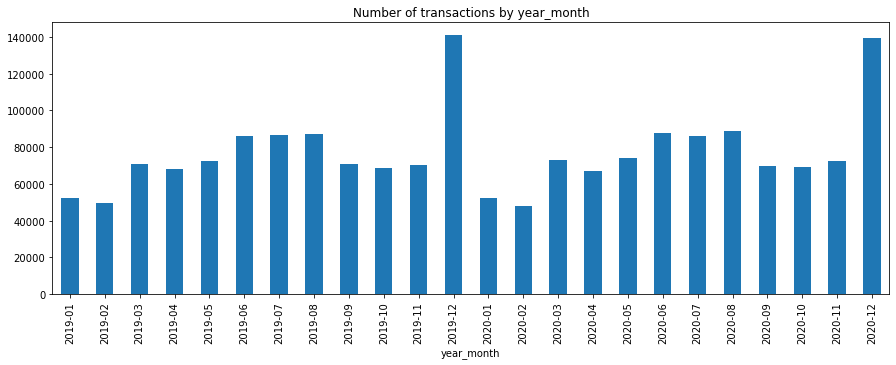

In [22]:
plt.figure(figsize=(15,5))
df_year_month.plot.bar()
plt.title('Number of transactions by year_month')
plt.show()

The month of December for both years (2019 and 2020) have the most transactions.  Let's see the same graph but exclusively for fraud transactions.

In [23]:
#Get the number of fraud transactions for each year_month
df_year_month_fraud = df[df['is_fraud']==1].groupby(df['year_month'])['trans_num'].count()

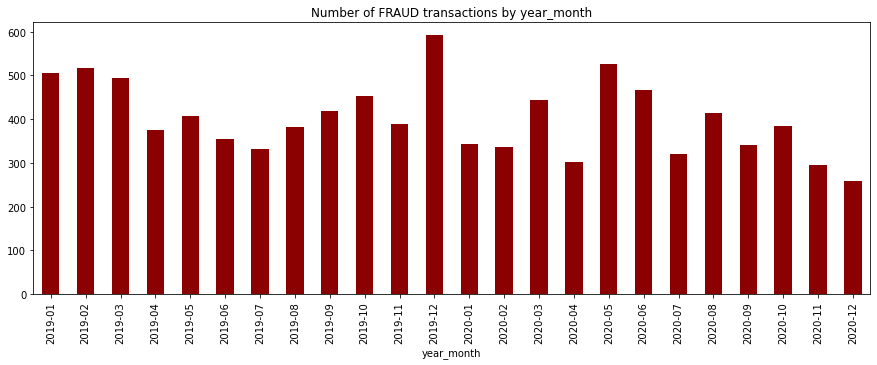

In [24]:
plt.figure(figsize=(15,5))
df_year_month_fraud.plot.bar(color = 'darkred')
plt.title('Number of FRAUD transactions by year_month')
plt.show()

year_month may not be a good predictor of fraud.

### Examine time since last transaction for each credit card

In [25]:
# define a function that will calculate the time difference
def timeDifference(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x

In [26]:
#Group dataframe by credit card number and apply the function
df = df.groupby('cc_num').apply(timeDifference)

In [27]:
# convert to seconds
df['time_diff'] = df['time_diff'].dt.seconds

Text(0.5, 1.0, 'Time difference of FRAUD transactions')

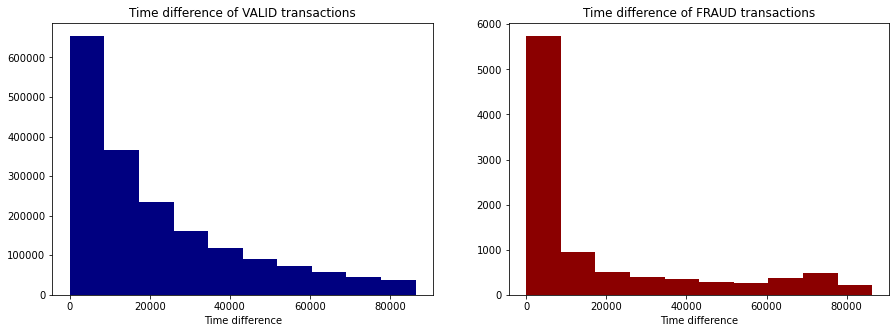

In [28]:
# compare time difference for valid vs fraud transactions

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(df[df['is_fraud']==0]['time_diff'], color = 'navy')
ax[1].hist(df[df['is_fraud']==1]['time_diff'], color = 'darkred')

ax[0].set_xlabel('Time difference')
ax[0].set_title('Time difference of VALID transactions')

ax[1].set_xlabel('Time difference')
ax[1].set_title('Time difference of FRAUD transactions')

In [29]:
# summary statistics for time_diff column
df['time_diff'].describe().apply(lambda x: format(x, 'f'))

count    1851244.000000
mean       21784.811082
std        20939.398892
min            0.000000
25%         5406.000000
50%        14422.000000
75%        32308.000000
max        86399.000000
Name: time_diff, dtype: object

In [30]:
# summary statistics for time_diff column within valid transactions
df[df.is_fraud==0]['time_diff'].describe().apply(lambda x: format(x, 'f'))

count    1841684.000000
mean       21806.336505
std        20920.163879
min            0.000000
25%         5445.000000
50%        14467.000000
75%        32327.000000
max        86399.000000
Name: time_diff, dtype: object

In [31]:
# summary statistics for time_diff column within FRAUD transactions
df[df.is_fraud==1]['time_diff'].describe()

count     9560.000000
mean     17638.051046
std      24007.194504
min          1.000000
25%       1455.750000
50%       4808.500000
75%      25638.250000
max      86381.000000
Name: time_diff, dtype: float64

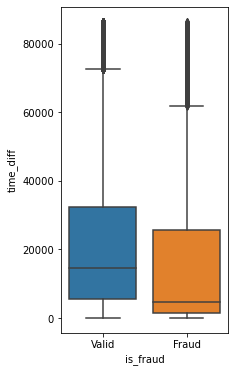

In [32]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['time_diff'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

On average, fraud transactions have a smaller time difference from the previous transaction than valid transactions

### Generate frequences of transactions done in last 1/7/30 days

In [33]:
#define new functions that will determine the number of transactions in the last 1/7/30 days
#function will also create a new column
def last24HourTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_24h_day').sort_index()
    count_24h = temp.rolling('24h').count() - 1
    count_24h.index = temp.values
    x['count_24_hour'] = count_24h.reindex(x.index)
    return x
def last7DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x

In [34]:
df = df.groupby('cc_num').apply(last24HourTransactionCount)

In [35]:
df = df.groupby('cc_num').apply(last7DaysTransactionCount)

In [36]:
df = df.groupby('cc_num').apply(last30DaysTransactionCount)

We'll start by looking at the count_24_hour column

Text(0.5, 1.0, '24 hour transactions of FRAUD transactions')

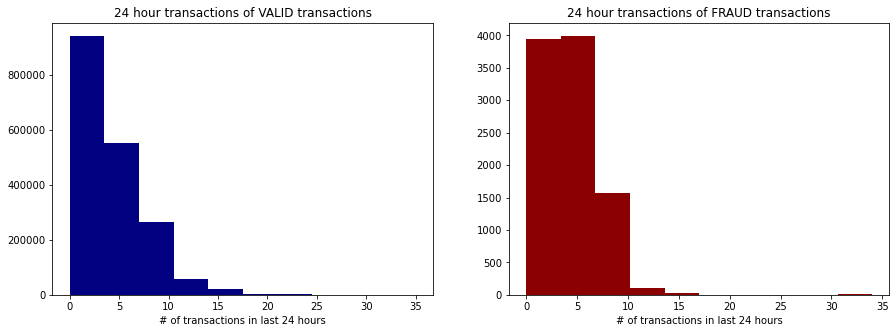

In [37]:
# compare count_24_hour for valid vs fraud transactions

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(df[df['is_fraud']==0]['count_24_hour'], color = 'navy')
ax[1].hist(df[df['is_fraud']==1]['count_24_hour'], color = 'darkred')

ax[0].set_xlabel('# of transactions in last 24 hours')
ax[0].set_title('24 hour transactions of VALID transactions')

ax[1].set_xlabel('# of transactions in last 24 hours')
ax[1].set_title('24 hour transactions of FRAUD transactions')

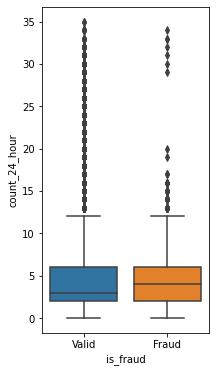

In [38]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['count_24_hour'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

While the IQR of count_24_hour is the same for valid and fraud transactions, the median of the fraud transactions is higher than that of the valid transactions.

Next we'll look at the count_7_day and count_30_day columns.

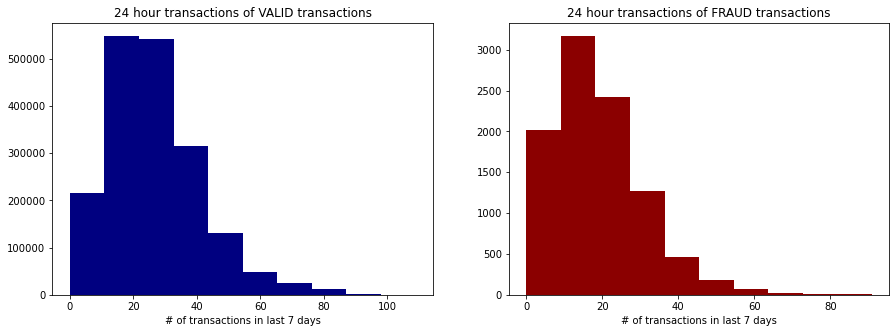

In [43]:
# compare count_7_days for valid vs fraud transactions

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(df[df['is_fraud']==0]['count_7_days'], color = 'navy')
ax[1].hist(df[df['is_fraud']==1]['count_7_days'], color = 'darkred')

ax[0].set_xlabel('# of transactions in last 7 days')
ax[0].set_title('24 hour transactions of VALID transactions')

ax[1].set_xlabel('# of transactions in last 7 days')
ax[1].set_title('24 hour transactions of FRAUD transactions')

plt.show()

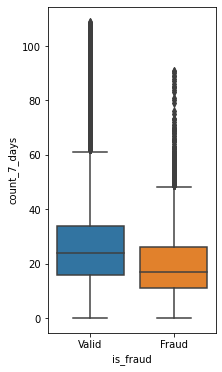

In [40]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['count_7_days'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

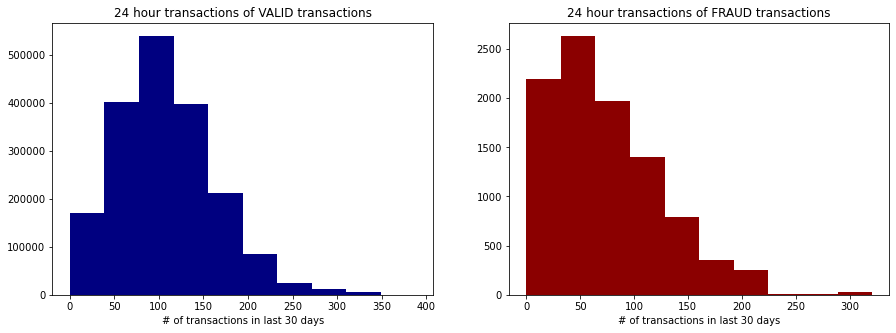

In [42]:
# compare count_30_days for valid vs fraud transactions

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(df[df['is_fraud']==0]['count_30_days'], color = 'navy')
ax[1].hist(df[df['is_fraud']==1]['count_30_days'], color = 'darkred')

ax[0].set_xlabel('# of transactions in last 30 days')
ax[0].set_title('24 hour transactions of VALID transactions')

ax[1].set_xlabel('# of transactions in last 30 days')
ax[1].set_title('24 hour transactions of FRAUD transactions')
plt.show()

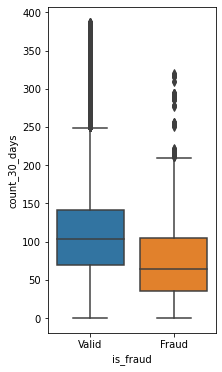

In [44]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['count_30_days'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

As awe increase the time period to the last 7 days and 30 days, there seems to be less fraud transactions than valid.  

It's possible that when someone's credit card information is stolen, the offender will use the credit card as much as possible in the first 24 hours and then stop using it after a certain point in time.  This halt could be due to discarding the stolen card information or that the card owner discovered fraud transactions on their own and reported it to the issuing bank.

## Exploring 'category'

/var/folders/lt/1zfznh390fb4hpfl9rj5cknc0000gn/T/ipykernel_38094/1018232570.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df[df['is_fraud']==0]['category'].value_counts().sort_index().index, rotation=90)
/var/folders/lt/1zfznh390fb4hpfl9rj5cknc0000gn/T/ipykernel_38094/1018232570.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(df[df['is_fraud']==1]['category'].value_counts().sort_index().index, rotation=90)


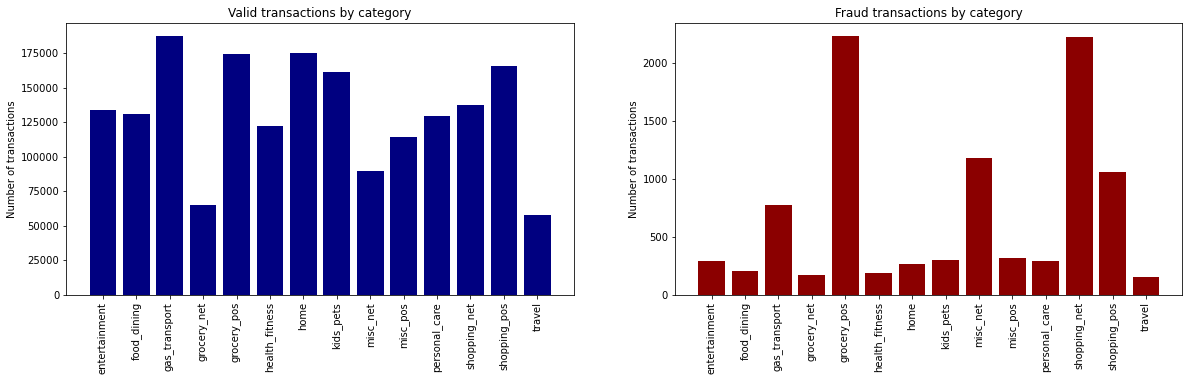

In [46]:
# plotting number of transactions by category for valid and fraud

fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].bar(df[df['is_fraud']==0]['category'].value_counts().sort_index().index, df[df['is_fraud']==0]['category'].value_counts().sort_index(), color = 'navy')
ax[1].bar(df[df['is_fraud']==1]['category'].value_counts().sort_index().index, df[df['is_fraud']==1]['category'].value_counts().sort_index(), color = 'darkred')

ax[0].set_xticklabels(df[df['is_fraud']==0]['category'].value_counts().sort_index().index, rotation=90)
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by category')
ax[1].set_xticklabels(df[df['is_fraud']==1]['category'].value_counts().sort_index().index, rotation=90)
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by category')

plt.show()

Valid transactions are spread out among categories, with a few that have significantly lower transactions (grocery_net, travel).

Fraud transactions are primarily in 'grocery_pos' and 'shopping_net' categories, with 'misc_net', 'shopping_pos', and 'gas_transport' as the next tier of transaction categories.  

'category' can be a decent predictor of fraud.  We will one hot encode this variable later on.

## Exploring 'amt'

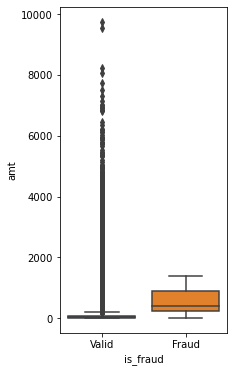

In [47]:
# create boxplots of amt column
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['amt'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

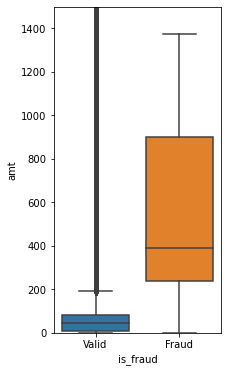

In [48]:
# boxplots again, but restricting y axis
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['amt'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.ylim(0, 1500)
plt.show()

In [49]:
#Compare means of amounts for valid vs fraud.
valid_amt_mean = np.mean(df[df.is_fraud==0]['amt'])
fraud_amt_mean = np.mean(df[df.is_fraud==1]['amt'])
print("Mean of valid transaction amounts:", valid_amt_mean)
print("Mean of fraud transaction amounts:", fraud_amt_mean)

Mean of valid transaction amounts: 66.88186880220937
Mean of fraud transaction amounts: 530.6614122888789


Even with large number of outliers from valid transactions, the mean of fraud transactions is still SIGNIFICANTLY higher than valid transactions.  The 'amt' column can definitely be a good predictor of fraud.  

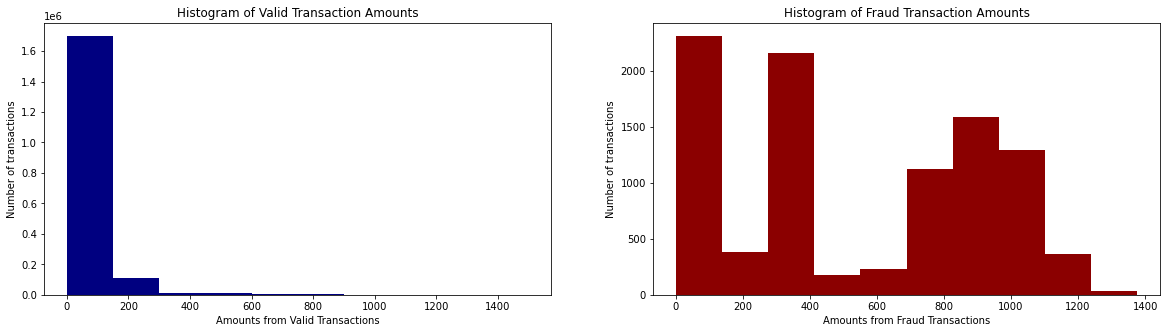

In [52]:
# Check histogram of 'amt' column
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist(df.loc[(df.is_fraud ==0) & (df.amt <= 1500)]['amt'], color = 'navy')
ax[1].hist(df.loc[(df.is_fraud ==1) & (df.amt <= 1500)]['amt'], color = 'darkred')

ax[0].set_xlabel('Amounts from Valid Transactions')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Histogram of Valid Transaction Amounts')

ax[1].set_xlabel('Amounts from Fraud Transactions')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Histogram of Fraud Transaction Amounts')

plt.show()

We'll compute intervals that include 95% of all valid transactions and identify the corresponding percentile for fraud transactions.

In [53]:
np.percentile(df[df.is_fraud==0]['amt'], 95)

189.46

In [74]:
np.percentile(df[df.is_fraud==1]['amt'], 24.16)

189.33880000000025

95% of all valid transactions are under \\$190, where as approximately 75% of all fraud transactions are greater than \\$190.

## Exploring 'gender'

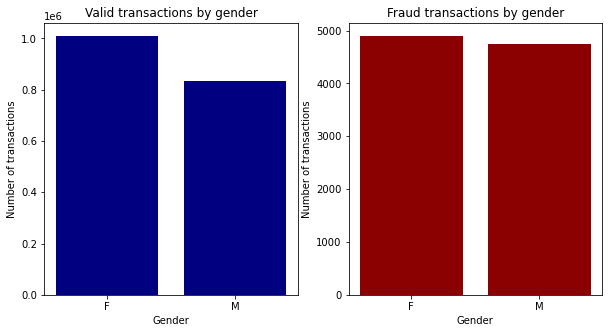

In [76]:
# construct bar plot for valid and fraud transactions by gender
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].bar(df[df.is_fraud==0]['gender'].value_counts().sort_index().index, df[df.is_fraud==0]['gender'].value_counts().sort_index(), color = 'navy')
ax[1].bar(df[df.is_fraud==1]['gender'].value_counts().sort_index().index, df[df.is_fraud==1]['gender'].value_counts().sort_index(), color = 'darkred')

ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by gender')

ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by gender')

plt.show()

It's possible that gender may have some slight correlation with is_fraud.  We'll one-hot encode this variable and drop the original gender variable.

In [77]:
#create dummies for gender
gen_dummies = pd.get_dummies(df['gender'],prefix='gender', drop_first = True)

In [78]:
# Concatenate one-hot encoded dataframes to main dataframe.
df = pd.concat([df, gen_dummies], axis=1)

In [79]:
df = df.drop('gender', axis = 1)

## Extracting and exploring 'distance'

We'll use the 'lat', 'long' variables and the 'merch_lat', 'merch_long' variables to calculate the distance from the customer and the merchant.

In [80]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [81]:
df['dist_haversine'] = \
    haversine(df['lat'], df['long'],
                 df['merch_lat'], df['merch_long'])

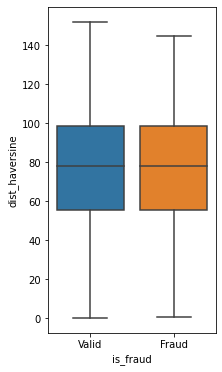

In [82]:
# check boxplots for distance

plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['dist_haversine'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

In [84]:
#Compare means of distances for valid vs fraud.
valid_dist_mean = np.mean(df[df.is_fraud==0]['dist_haversine'])
fraud_dist_mean = np.mean(df[df.is_fraud==1]['dist_haversine'])
print("Mean distance of valid transaction:", valid_dist_mean)
print("Mean distance of fraud transaction:", fraud_dist_mean)

Mean distance of valid transaction: 76.11081977183252
Mean distance of fraud transaction: 76.256233382728


Does not seem like distance is a good predictor of fraud.

## Exploring 'city_pop'

Is it possible that more fraud occurs in higher population cities?

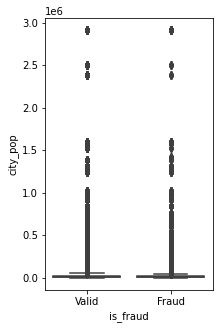

In [85]:
# boxplots
plt.figure(figsize=(3, 5))
sns.boxplot(x=df['is_fraud'], y = df['city_pop'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

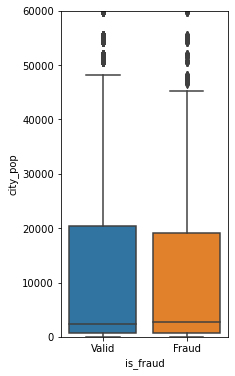

In [86]:
# boxplots again, but restricting y-axis
plt.figure(figsize=(3, 6))
sns.boxplot(x=df['is_fraud'], y = df['city_pop'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.ylim(0, 60000)
plt.show()

In [87]:
#Compare means of city pop for valid vs fraud.
valid_pop_mean = np.mean(df[df.is_fraud==0]['city_pop'])
fraud_pop_mean = np.mean(df[df.is_fraud==1]['city_pop'])
print("Mean of valid transaction city populations:", valid_pop_mean)
print("Mean of fraud transaction city populations:", fraud_pop_mean)

Mean of valid transaction city populations: 88635.7918497421
Mean of fraud transaction city populations: 89998.42296135116


Does not seem like 'city_pop' is a strong predictor of fraud.

## Exploring 'state'

In [88]:
#Get number of unique states from valid transactions
valid_state_count = df[df.is_fraud==0]['state'].value_counts().sort_index()
# Get number of unique states from fraud transactions
fraud_state_count = df[df.is_fraud==1]['state'].value_counts().sort_index()

/var/folders/lt/1zfznh390fb4hpfl9rj5cknc0000gn/T/ipykernel_38094/741888491.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = valid_state_count.index,rotation=90)
/var/folders/lt/1zfznh390fb4hpfl9rj5cknc0000gn/T/ipykernel_38094/741888491.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels = fraud_state_count.index,rotation=90)


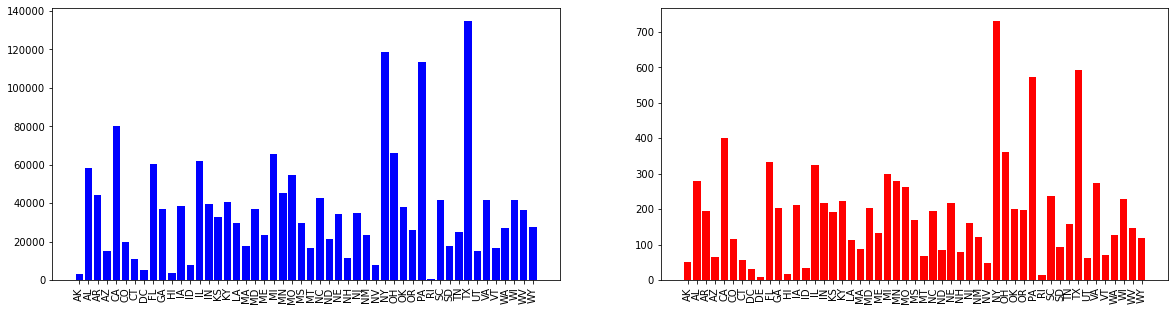

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Define bar width.
bar_width = 0.8

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax[0].bar(valid_state_count.index, valid_state_count, width = bar_width, color = 'blue')
b2 = ax[1].bar(fraud_state_count.index, fraud_state_count, width = bar_width, color = 'red')

ax[0].set_xticklabels(labels = valid_state_count.index,rotation=90)
ax[1].set_xticklabels(labels = fraud_state_count.index,rotation=90)
plt.show()

NY, PA, and TX have the most number of transactions, both fraud and valid

In [90]:
#See if there are certain states that have significantly higher fraud transactions or valid transactions:
# get percentages
valid_state_pct = df[df.is_fraud==0]['state'].value_counts(normalize=True).sort_values(ascending=False)
fraud_state_pct = df[df.is_fraud==1]['state'].value_counts(normalize=True).sort_values(ascending=False)

In [91]:
valid_state_pct

TX    0.073083
NY    0.064409
PA    0.061649
CA    0.043462
OH    0.035961
MI    0.035559
IL    0.033586
FL    0.032798
AL    0.031608
MO    0.029653
MN    0.024502
AR    0.024104
NC    0.023302
WI    0.022526
SC    0.022519
VA    0.022511
KY    0.022119
IN    0.021338
IA    0.020943
OK    0.020539
MD    0.020155
GA    0.020153
WV    0.019744
NJ    0.018978
NE    0.018562
KS    0.017771
MS    0.016199
LA    0.016193
WY    0.015009
WA    0.014606
OR    0.014225
TN    0.013434
NM    0.012647
ME    0.012644
ND    0.011451
CO    0.010664
SD    0.009488
MA    0.009483
VT    0.009085
MT    0.009082
AZ    0.008302
UT    0.008301
NH    0.006319
CT    0.005927
NV    0.004348
ID    0.004343
DC    0.002767
HI    0.001972
AK    0.001581
RI    0.000396
Name: state, dtype: float64

In [92]:
fraud_state_pct

NY    0.075640
TX    0.061341
PA    0.059268
CA    0.041654
OH    0.037302
FL    0.034608
IL    0.033572
MI    0.030981
MN    0.029013
AL    0.028805
VA    0.028287
MO    0.027147
SC    0.024453
WI    0.023624
KY    0.023003
IN    0.022485
NE    0.022381
IA    0.021863
GA    0.021138
MD    0.021034
OK    0.020723
OR    0.020412
NC    0.020205
AR    0.020205
KS    0.019998
MS    0.017511
NJ    0.016682
TN    0.016475
WV    0.015128
ME    0.013885
WA    0.013056
NM    0.012538
WY    0.012330
CO    0.011916
LA    0.011709
SD    0.009533
MA    0.009015
ND    0.008704
NH    0.008186
VT    0.007460
MT    0.007150
AZ    0.006631
UT    0.006321
CT    0.005803
AK    0.005181
NV    0.004870
ID    0.003419
DC    0.003212
HI    0.001658
RI    0.001554
DE    0.000933
Name: state, dtype: float64

'state' does not seem like a strong predictor of fraud. It's likely that if we were to one-hot encode this, our dataset would suffer from the curse of dimensionality.

## Extracting and exploring 'age'

We will extract age by subtracting 'trans_date_trans_time' from 'age'

In [93]:
df['dob'] = pd.to_datetime(df['dob'])

In [94]:
#create age column
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

Text(0.5, 1.0, 'Fraud transactions by age')

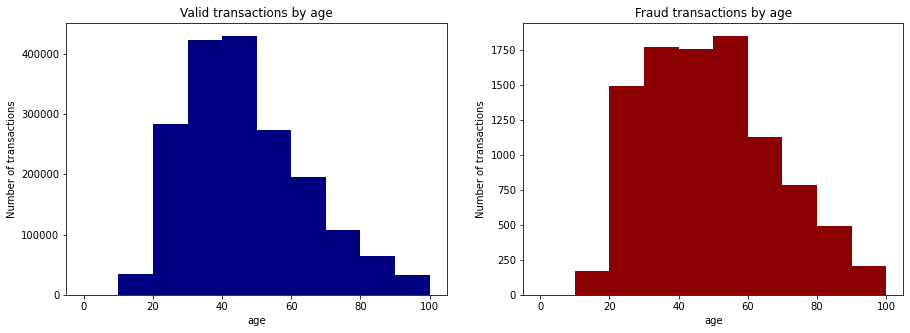

In [95]:
#check histograms
fig, ax = plt.subplots(1, 2, figsize=(15,5))

bins =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

ax[0].hist(df[df.is_fraud==0]['age'], color = 'navy', bins = bins)
ax[1].hist(df[df.is_fraud==1]['age'], color = 'darkred', bins = bins)

ax[0].set_xlabel('age')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by age')

ax[1].set_xlabel('age')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by age')

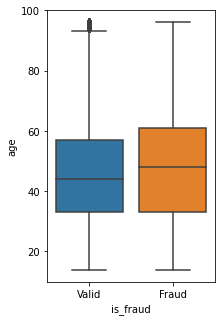

In [96]:
# boxplots
plt.figure(figsize=(3, 5))
sns.boxplot(x=df['is_fraud'], y = df['age'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

In [97]:
#Compare means of age for valid vs fraud.
valid_age_mean = np.mean(df[df.is_fraud==0]['age'])
fraud_age_mean = np.mean(df[df.is_fraud==1]['age'])
print("Mean of age for valid transactions:", valid_age_mean)
print("Mean of age for fraud transaction:", fraud_age_mean)

Mean of age for valid transactions: 46.19740941022212
Mean of age for fraud transaction: 48.83784063827583


'age' may be a somewhat decent predictor of fraud.  On average, as the 'age' of the customer is older, it seems as though they are slightly more susceptible to fraud.

## Check correlations

In [98]:
corr = df.corr()

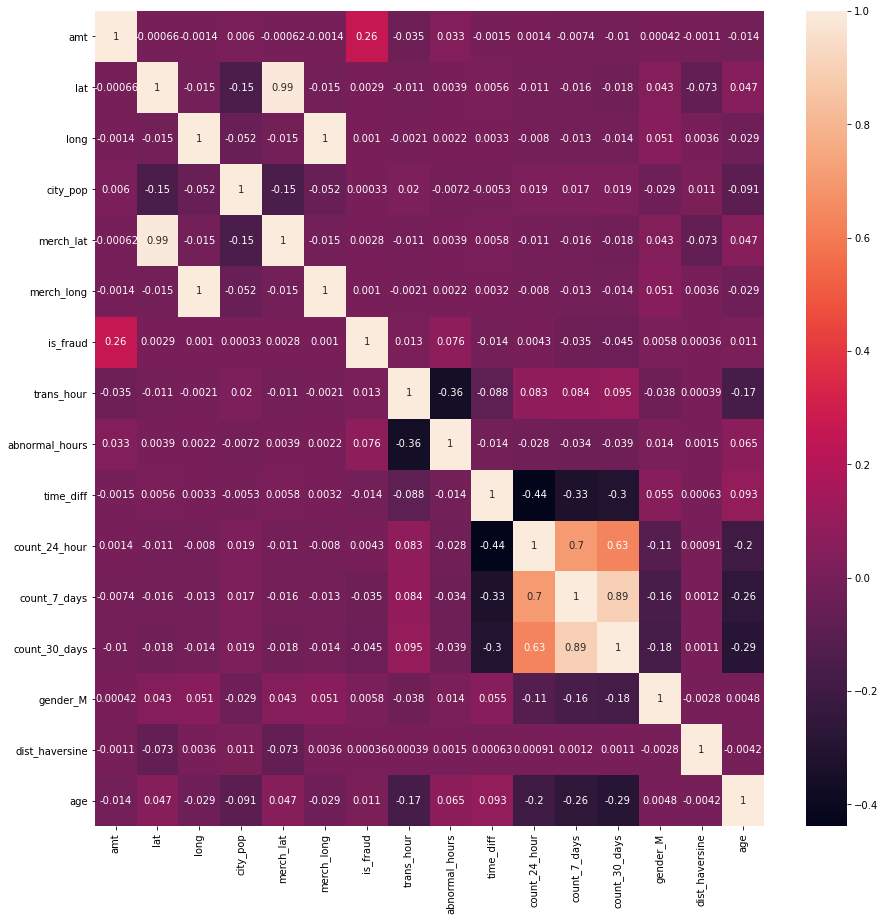

In [99]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

In [100]:
df.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud          1.000000
amt               0.261309
abnormal_hours    0.075933
count_30_days     0.044932
count_7_days      0.035322
time_diff         0.014268
trans_hour        0.013201
age               0.010928
gender_M          0.005844
count_24_hour     0.004317
lat               0.002904
merch_lat         0.002778
long              0.001022
merch_long        0.001000
dist_haversine    0.000360
city_pop          0.000325
Name: is_fraud, dtype: float64

## Potentially good predictors of fraud:

- 'amt'
- 'abnormal_hours'
- 'count_30_days'
- 'count_7_days'
- 'time_diff'
- 'age'
- 'gender_M'
- 'count_24_hour'

In [101]:
#save the data to a new csv file
df.to_csv('../cleaned_data/cc_data_cleaned2.csv')